## PS4 Yuming Liu

### Problem 2.1

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time

In [2]:
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35
nvec = np.array([1, 1, 0.2])
SS_tol = 1e-9
f_params = [nvec, A, alpha, delta]

In [3]:
def get_r(K, L, alpha, delta, A):
    return A * alpha * ((L / K) ** (1 - alpha)) - delta
def get_w(K, L, alpha, A):
    return A * (1 - alpha) * ((K / L) ** alpha)
def get_K(b2, b3):
    return b2 + b3
def get_cons(b_s, b_s_1, n_s, r, w):
    return w * n_s + (1 + r) * b_s - b_s_1
def get_util(c, sigma = 3):
    return (c ** (1-sigma))/(1-sigma)
def get_MU(c, sigma = 3):
    return c ** (-sigma)
def get_Y(K, L, alpha, A):
    return A * (K ** alpha) * (L ** (1-alpha))

In [4]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    b2, b3 = bvec_guess
    K = b2 + b3
    L = nvec.sum()
    r = get_r(K, L, alpha, delta, A)
    w = get_w(K, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r, w)
    c2 = get_cons(b2, b3, nvec[1], r, w)
    c3 = get_cons(b3, 0, nvec[2], r, w)
    b_cnstr = np.zeros(2, dtype = 'bool')
    c_cnstr = np.zeros(3, dtype = 'bool')
    K_cnstr = ((b2 + b3)<=0)
    c_cnstr[0] = (c1<=0)
    c_cnstr[1] = (c2<=0)
    c_cnstr[2] = (c3<=0)
    if c_cnstr[0]:
        b_cnstr[0] = True
    if c_cnstr[1]:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2]:
        b_cnstr[1] = True
    return b_cnstr, c_cnstr, K_cnstr

#### a.

In [5]:
bvec_guess = np.array([1.0, 1.2])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(K_cnstr)

[ True False]
[ True False False]
False


If I choose an initial guess for steady-state savings of bvec_guess = np.array([1.0, 1.2]), the results indicate that the constraints of consumptions and savings at period 1 would be violated.

#### b.

In [6]:
bvec_guess = np.array([0.06, -0.001])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(K_cnstr)

[False False]
[False False False]
False


If I choose an initial guess for steady-state savings of bvec_guess = np.array([0.06, -0.001]), the results indicate that no constraint would be violated.

#### c.

In [7]:
bvec_guess = np.array([0.1, 0.1])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(K_cnstr)

[False False]
[False False False]
False


If I choose an initial guess for steady-state savings of bvec_guess = np.array([0.1, 0.1]), the results indicate that no constraint would be violated.

### Problem 2.2

In [8]:
def EulEqs(bvec, f_params):
    nvec, A, alpha, delta, beta = f_params
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(b2, b3)
    r = get_r(K, L, alpha, delta, A)
    w = get_w(K, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r, w)
    c2 = get_cons(b2, b3, nvec[1], r, w)
    c3 = get_cons(b3, 0, nvec[2], r, w)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r) * MU2
    Eul2 = MU2 - beta*(1+r) * MU3
    Euler_eqs = np.array([Eul1, Eul2])
    return Euler_eqs

In [9]:
def get_SS(params, bvec_guess, SS_graphs = False):
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    f_params = np.array([nvec, A, alpha, delta, beta])
    b_ss = opt.root(EulEqs, bvec_guess, args = (f_params)).x
    b2, b3 = b_ss
    K_ss = get_K(b2, b3)
    r_ss = get_r(K_ss, L, alpha, delta, A)
    Y_ss = get_Y(K_ss, L, alpha, A)
    w_ss = get_w(K_ss, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r_ss, w_ss)
    c2 = get_cons(b2, b3, nvec[1], r_ss, w_ss)
    c3 = get_cons(b3, 0, nvec[2], r_ss, w_ss)
    c_ss = np.array([c1, c2, c3])
    C_ss = c_ss.sum()
    EulErr_ss = EulEqs(b_ss, f_params)
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
    'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    
    if SS_graphs:
        fig, ax = plt.subplots()
        ax.plot(np.arange(1,4), c_ss, marker = 'o', label = 'consumptions in equilibrium')
        ax.plot(np.arange(2,4), b_ss, marker = 'o', label = 'savings in equilibrium')
        ax.legend()
        ax.grid()
        ax.set_title('Consumptions and Savings in Equilibrium')
        plt.show()
    return ss_output

#### a.

In [10]:
params = [beta, sigma, nvec, nvec.sum(), A, alpha, delta, SS_tol]
bvec_guess = np.array([0.1, 0.1])
ss_output = get_SS(params, bvec_guess)

In [11]:
print('The values for steady-state equilibrium savings are',ss_output['b_ss'])
print('The values for steady-state equilibrium consumptions are',ss_output['c_ss'])
print('The value for steady-state equilibrium wage is',ss_output['w_ss'])
print('The value for steady-state equilibrium interest rate is',ss_output['r_ss'])
print('The value for steady-state equilibrium capital is',ss_output['K_ss'])
print('The value for steady-state equilibrium output is',ss_output['Y_ss'])
print('The value for steady-state equilibrium total consumption is',ss_output['C_ss'])
print('The values for steady-state equilibrium Euler errors are',ss_output['EulErr_ss'])
print('The values for steady-state equilibrium resource constraint error is',ss_output['RCerr_ss'])
print('The time to compute the steady-state equilibrium is', ss_output['ss_time'], 'seconds')

The values for steady-state equilibrium savings are [0.01931253 0.0584111 ]
The values for steady-state equilibrium consumptions are [0.18241213 0.20961468 0.24087387]
The value for steady-state equilibrium wage is 0.20172465739052575
The value for steady-state equilibrium interest rate is 2.433062339127069
The value for steady-state equilibrium capital is 0.07772362575316386
The value for steady-state equilibrium output is 0.6827603788602411
The value for steady-state equilibrium total consumption is 0.6329006729395864
The values for steady-state equilibrium Euler errors are [-1.39266376e-12  2.62900812e-12]
The values for steady-state equilibrium resource constraint error is 8.326672684688674e-17
The time to compute the steady-state equilibrium is 0.0008437000000000001 seconds


#### b.

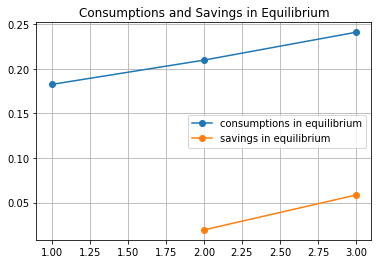

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.001078599999999999}

In [12]:
get_SS(params, bvec_guess, True)

#### c. 

In [13]:
params2 = [0.55, sigma, nvec, nvec.sum(), A, alpha, delta, SS_tol]
ss_output2 = get_SS(params2, bvec_guess)
print('The values for steady-state equilibrium savings are',ss_output2['b_ss'], 'compared with previous', ss_output['b_ss'])
print('The values for steady-state equilibrium consumptions are',ss_output2['c_ss'], 'compared with previous', ss_output['c_ss'])
print('The value for steady-state equilibrium wage is',ss_output2['w_ss'], 'compared with previous', ss_output['w_ss'])
print('The value for steady-state equilibrium interest rate is',ss_output2['r_ss'], 'compared with previous', ss_output['r_ss'])

The values for steady-state equilibrium savings are [0.02817692 0.07686545] compared with previous [0.01931253 0.0584111 ]
The values for steady-state equilibrium consumptions are [0.19597528 0.22861594 0.26669307] compared with previous [0.18241213 0.20961468 0.24087387]
The value for steady-state equilibrium wage is 0.22415219593446706 compared with previous 0.20172465739052575
The value for steady-state equilibrium interest rate is 1.8863765057189819 compared with previous 2.433062339127069


The new results show that the wage, saving, and consumpiton at any period are higher than the stats before, and the interest rate gets lower. 

People, who like the future, would save more to invest in the future, so to make people save and consuming, the interest rate should be lower now. 

### Problem 2.3

#### a.

In [14]:
def timepath(K_path_update, K_init, K_ss, T, A, alpha, delta, nvec, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], nvec.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], nvec.sum(), alpha, delta, A)
    return path

def EulErr(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(b2, b3)
    c1 = get_cons(0, b2, nvec[0], r2, w1)
    c2 = get_cons(b2, b3, nvec[1], r2, w2)
    c3 = get_cons(b3, 0, nvec[2], r3, w3)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_errs = np.array([Eul1, Eul2])
    return Euler_errs

In [15]:
def solve_path(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val
    def get_b32(b32, *args):
        r2, r3, b21, w2, w3, beta, sigma, nvec = args
        c2  = get_cons(b21, b32, nvec[1], r2, w2)
        c3  = get_cons(b32, 0, nvec[2], r3, w3)
        MU2 = get_MU(c2)
        MU3 = get_MU(c3)
        error =  MU2 - beta * (1 + r3) * MU3
        return error
    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, nvec)
    b32 = opt.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec)
        bvec_ts = opt.root(EulErr, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat

In [16]:
def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = solve_path(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
    diff_init = sum(((path_init[: -m, 1] - b_HH_init[: -m, 2])/path_init[: -m, 1])**2)
    if diff_init > tol:
        '''
        if the initial epsilon is larger than the tolerance
        we update the time path and calculated time path and recalculate the epsilon
        '''
        path = path_init
        b_HH = b_HH_init
        diff = diff_init
        iter_num = 0
        while diff > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = timepath(update, 0, K_ss, T, A, alpha, delta, nvec, m, "update")
            b_HH = solve_path(path, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
            diff = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
            print("iteration: ", iter_num, "    difference: ", diff)

        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result

In [17]:
xival = 0.1
tol = 1e-9
bvec_init = np.array([0.8 * ss_output['b_ss'][0], 1.1 * ss_output['b_ss'][1]])
T = 25
m = 25
bvec_ss = ss_output['b_ss']
K_ss = ss_output['K_ss']
K_init = bvec_init.sum()
path_init = timepath(0, K_init, K_ss, T, A, alpha, delta, nvec, m, "linear")

In [18]:
path = TPI(path_init, xival, tol,  bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss)

iteration:  1     difference:  0.0026923268543442274
iteration:  2     difference:  0.002157561740107381
iteration:  3     difference:  0.0017408174700849334
iteration:  4     difference:  0.0014142121894262733
iteration:  5     difference:  0.001156736568482737
iteration:  6     difference:  0.0009525098783005804
iteration:  7     difference:  0.0007894893845593586
iteration:  8     difference:  0.0006585123205853978
iteration:  9     difference:  0.0005525827671266743
iteration:  10     difference:  0.00046633946890379505
iteration:  11     difference:  0.0003956577161222008
iteration:  12     difference:  0.0003373508229514696
iteration:  13     difference:  0.00028894577394323863
iteration:  14     difference:  0.00024851422573664284
iteration:  15     difference:  0.0002145449103690303
iteration:  16     difference:  0.00018584706684335225
iteration:  17     difference:  0.00016147717292832263
iteration:  18     difference:  0.00014068320855806213
iteration:  19     difference:  0

In [19]:
K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]

Eulerr_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)

In [20]:
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, nvec.sum(), alpha, A)
    c1t = get_cons(0, b2t, nvec[0], rt, wt)
    c2t = get_cons(b2t1, b3t, nvec[1], rt1, wt)
    c3t = get_cons(b3t1, 0, nvec[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    Eulerr_path[i, :] = EulErr(b_path[i, :], w_path[i,1], w_path[i+1,1], w_path[i+2,1], 
                               r_path[i+1,1], r_path[i+2,1], beta, alpha, delta, sigma, A, nvec)

In [21]:
print('The maximum value of the absolute values of all Euler errors across the entire time path =', np.abs(Eulerr_path).max())
print('The maximum value of the absolute values of all resource constraint errors across the entire time path =', np.abs(RCerr_path).max())

The maximum value of the absolute values of all Euler errors across the entire time path = 37.40392775466471
The maximum value of the absolute values of all resource constraint errors across the entire time path = 0.005773427692391937


#### b.

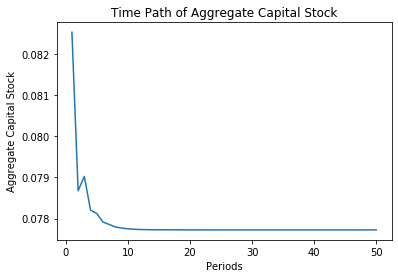

In [22]:
K_fig = plt.figure()
plt.plot(K_path[: , 0], K_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Aggregate Capital Stock')
plt.title('Time Path of Aggregate Capital Stock')
plt.show()

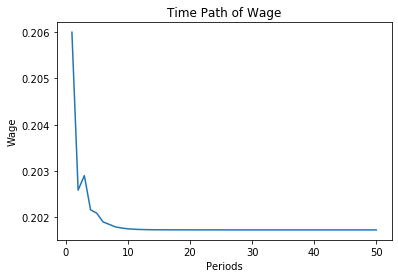

In [23]:
w_fig = plt.figure()
plt.plot(w_path[: , 0], w_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Wage')
plt.title('Time Path of Wage')
plt.show()

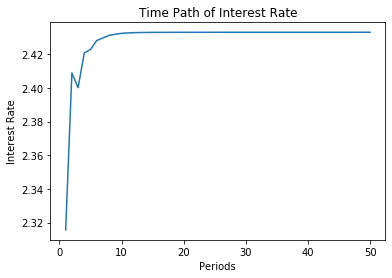

In [24]:
r_fig = plt.figure()
plt.plot(r_path[: , 0], r_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Interest Rate')
plt.title('Time Path of Interest Rate')
plt.show()

#### c.

In [25]:
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 0.00001:
        print('It takes {} periods to get within 0.00001 of the steady-state aggregate capital stock.'.format(int(K_path[i, 0])))
        break

It takes 13 periods to get within 0.00001 of the steady-state aggregate capital stock.


In [26]:
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 0.00001) == 0:
        print("The period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state is period {}".format(int(K_path[i, 0])))
        break

The period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state is period 13
